In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Housing Price data set.csv")
for i in data.columns:
    x={'yes':1,'no':0}
    if data[i].dtype=='object':
#         data=data.drop([i],axis=1)
        data[i]=data[i].map(x)
data=data.drop(['Unnamed: 0'],axis=1)
# data = shuffle(data) 
price_mean, price_std = data.mean()[0], data.std()[0]
data  = (data - data.mean())/data.std()
data.insert(loc=1,column='bias',value=np.ones([data.shape[0],1]))
# print(data.head())
inp = data.iloc[:,1:]
outp = data.iloc[:,:1]
# train_data, train_label = inp.iloc[:(int)(inp.shape[0]*.75),:] , outp.iloc[:(int)(inp.shape[0]*.75),:] 
# test_data, test_label = inp.iloc[(int)(inp.shape[0]*.75):,:] , outp.iloc[(int)(inp.shape[0]*.75):,:] 
train_data, train_label = inp, outp
test_data, test_label = inp, outp
# print(inp.head())
# print(outp.head())

tau :  1 => accuracy :  91.3853507002078
tau :  101 => accuracy :  82.33961020951273
tau :  201 => accuracy :  82.33879111458734
tau :  301 => accuracy :  82.33863782073276
tau :  401 => accuracy :  82.33858396175602
tau :  501 => accuracy :  82.33855898225467
tau :  601 => accuracy :  82.33854539605514
tau :  701 => accuracy :  82.33853719695044
tau :  801 => accuracy :  82.33853187207961
tau :  901 => accuracy :  82.33852821962357


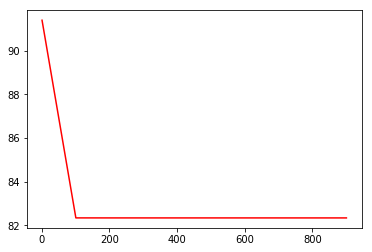

In [6]:
def tau_norm_weights(x, x0, tau):
    weg = np.exp(np.sum((x-x0)*(x-x0), axis=1)/(-2*tau*tau))
    weg = np.diag(weg)
    return np.array(weg)

def error_comp(H,Y):
    return abs((Y - H)/ Y)

def norm(X, Y, X0,tau):
    weg = tau_norm_weights(X, X0, tau)
    XWEG = X.T.dot(weg)
    XY_Li=np.linalg.inv(np.dot(XWEG,X))
    XY=np.dot(XWEG,Y)
    W=np.dot(XY_Li,XY)
    return W
Tau=[]
Accuracy=[]
for tau in range(1,1001,100):
    X = np.array(train_data)
    Y = np.array(train_label)
    tot = 0.0
    for x0 in range(len(X)): 
        W = norm(X, Y, X[x0],tau)
        prediction = np.array(X[x0].dot(W))
        prediction = prediction * price_std + price_mean
        YY = Y[x0] * price_std + price_mean
        err = error_comp(prediction, YY)
        tot += err
    print("tau : ",tau,"=> accuracy : ",(1-(tot/len(X))[0])*100)
    Tau.append(tau)
    Accuracy.append((1-(tot/len(X))[0])*100)
plt.plot(Tau,Accuracy,'-r')

tau :  1 => accuracy :  83.12141168366337
tau :  101 => accuracy :  82.33596842229981
tau :  201 => accuracy :  82.33516514969371
tau :  301 => accuracy :  82.33501481039936
tau :  401 => accuracy :  82.33496198899883
tau :  501 => accuracy :  82.33493749063274
tau :  601 => accuracy :  82.33492416609666
tau :  701 => accuracy :  82.33491612489469
tau :  801 => accuracy :  82.33491090256999
tau :  901 => accuracy :  82.33490732045125


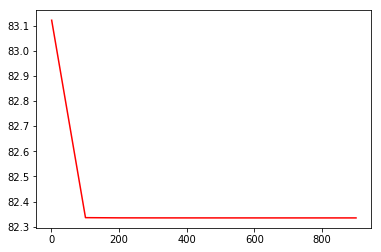

In [4]:
def cost(H,Y):
    return ((1/(2*len(Y)))*(sum((H-Y)*(H-Y))))[0]


def gradient_descent(X,Y,W,l,learning_rate,epochs,X0,tau):
    weg = tau_norm_weights(X, X0, tau)
    act_Y = Y.reshape(len(Y))
    for i in range(epochs):
        h_x=X.dot(W)
        W = W - (1/len(Y))*learning_rate*((X.T.dot(weg)).dot(h_x - Y))
    return W
Tau=[]
Accuracy=[]
for tau in range(1,1001,100):
    X = np.array(train_data)
    Y = np.array(train_label)
    tot = 0.0
    learning_rate = 1e-1
    epochs = 100
    for x0 in range(len(X)): 
#         W = norm(X, Y, X[x0],tau)
        W = np.zeros([X.shape[1],1])
        W =gradient_descent(X,Y,W,0,learning_rate,epochs,X[x0],tau)
        prediction = np.array(X[x0].dot(W))
        prediction = prediction * price_std + price_mean
        YY = Y[x0] * price_std + price_mean
        err = error_comp(prediction, YY)
        tot += err
    print("tau : ",tau,"=> accuracy : ",(1-(tot/len(X))[0])*100)
    Tau.append(tau)
    Accuracy.append((1-(tot/len(X))[0])*100)
plt.plot(Tau,Accuracy,'-r')